In [1]:
# Import:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from toolbox.experiment import Experiment
from toolbox.SINDy import SINDy
from toolbox.symbolic_SINDy import symbolic_SINDy
from toolbox.cusum import CUSUM
from toolbox.auxiliary_functions import set_param_freq
from data import SINDy_data, equations

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [5]:
# Select ODE:
ode_name = 'TVLvODE2_d'
ode_param = "1.,-0.1,-1.5,0.075"
freq = 20
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

# Parameters:
freq_SR = 20
n_sample = 50 
noise_ratio = 0.01
seed = 100 
n_seed = 1 
dt = 1 / freq
dim_x = 3
dim_k = 0
SW_length = 10 # SINDy sliding window length
SW_length_SR = 10 # SR sliding window length
H = 80 # length of the experiment
lazy = False # if True, we do not recompute the building blocks with SR
symbolic = True # if True, SR call is allowed, otw. simple SINDy is used throughout the whole experiment

# CUSUM parameters:
N = 10 # 10
eps = 0.1
threshold = 1.

In [ ]:
# Generate data: (16min 32.8sec)
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, 0, H)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# Save data:
file_path = 'saved/data/TVLvODE2_d_data.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

In [6]:
# Load data:
file_path = 'saved/data/TVLvODE2_d_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

In [7]:
# Initialize experiment and model discovery methods:
exp = Experiment(ode, ode_param, freq_SR, n_sample, noise_ratio, seed, n_seed, dt, dim_x, dim_k, SW_length, SW_length_SR, H, lazy, symbolic)

cusum = CUSUM(N, eps, threshold)

SINDy_method = SINDy(degree=2, include_bias=True, threshold=0.07)

SR_method = 'D-CODE' # symbolic regression method chosen 
x_id = 0  # equation to be identified by SR 
symbolic_SINDy_method = symbolic_SINDy(SR_method, x_id=0, degree=2, product=True, threshold=0.07, penalty=10, max_patience=6)

In [ ]:
# Run the experiment:

while exp.T <= exp.H:

    print(f't: {exp.T}')

    # update time-window:
    X_list_t = [x[(exp.T0*freq):(exp.T*freq)] for x in X_list]
    dX_list_t = [dx[(exp.T0*freq):(exp.T*freq)] for dx in dX_list]  

    exp.step_forward(SINDy_method, symbolic_SINDy_method, cusum, X_list_t, dX_list_t, param_list, feature_names, CP_threshold=0.8)

    # building block search time: .m .s
    # total time: 37m 16.6s

t: 10
SINDy model:
(X0)' = 0.999 X0 + -0.100 X0 X1
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model complexity:  5
Lasso penalty:  3.6710840134960967
RMSE:  0.04348661496353456

t: 11
Time:  11
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.044784137953939075

t: 12
Time:  12
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.042748165128714405

t: 13
Time:  13
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.04067641381016084

t: 14
Time:  14
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.04104388451747807

t: 15
Time:  15
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.041514929535921924

t: 16
Time:  16
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.042832611323984186

t: 17
Time:  17
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.044896680433242735

t: 18
Time:  18
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.044385772186677

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.204 1 + 1.012 X0 + -0.100 X0 X1 + 1.973 sin(5.006934060683674*X2) + 0.191 X2 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1.4378823233418738, 1.4378823233418738, 1.4378823233418738, 2.1486302255710696, 1.4378823233418738, 1.4378823233418738, 1.4378823233418738, 1.484508134659123, 1000, 1.4414098774782802, 111.08493289632095, 0.48900565144631924]

Best building block:
['sin(5.006934060683674*X2)']

smart-SINDy model:
(X0)' = -0.204 1 + 1.012 X0 + -0.100 X0 X1 + 1.973 sin(5.006934060683674*X2) + 0.191 X2 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  6.052919195860742
RMSE:  0.4169329076558349

t: 31
Time:  31
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5116172855076647

t: 32
Time:  32
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.8488792312732508

t: 33
Time:  33
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 23 , 33 ]

Searching for the best building block:
Model:
(X0)' = -0.103 1 + 1.029 X0 + -0.102 X0 X1 + 0.268 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.104 1 + 1.029 X0 + -0.103 X0 X1 + 0.373 sin(sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.110 1 + 1.024 X0 + -0.102 X0 X1 + 0.106 sin(X0)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.086 1 + 1.025 X0 + -0.102 X0 X1 + 0.377 sin(sin(X1))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.096 1 + 1.025 X0 + -0.102 X0 X1 + -2.638 sin(X1 + 2.0632421066628317) + 0.095 X2 sin(X1 + 2

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.381 1 + 1.023 X0 + -0.100 X0 X1 + 0.185 sin(5.006934060683674*X2) + 0.360 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1.011849315662511, 1.04141799942188, 1.1763844669023151, 1.4246551468898607, 1.411268206675858, 7.9849071305319095, 1.2015699508749693, 1.2015699508749693, 1.4224983348884654, 1.174616611923604, 1000, 1.1985166985592204, 94.02774698653403, 1.2399595683568942]

Best building block:
['sin(X2)']

smart-SINDy model:
(X0)' = -0.103 1 + 1.029 X0 + -0.102 X0 X1 + 0.268 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model complexity:  7
Lasso penalty:  4.073860384047375
RMSE:  0.7103940678781403

t: 34
Time:  34
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  1.0926816219374647

t: 35
Time:  35
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 25 , 35 ]

Searching for the best building block:
Model:
(X0)' = 13.487 1 + 1.036 

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.382 1 + 1.025 X0 + -0.100 X0 X1 + 0.203 sin(5.006934060683674*X2) + 0.359 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.999 1
errors:  [1000, 1000, 1.2494294567342925, 1.328421782893675, 1.186251484258441, 5.511605483787666, 1.3188625623884618, 1.3235516890557226, 1.3267806712510957, 1.2454295811292626, 1000, 1.2078122065656685, 89.38187096208445, 0.8337266537778716]

Best building block:
['sin(5.006934060683674*X2)']

smart-SINDy model:
(X0)' = -0.382 1 + 1.025 X0 + -0.100 X0 X1 + 0.203 sin(5.006934060683674*X2) + 0.359 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.999 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  4.641390122610068
RMSE:  0.5074787392179355

t: 36
Time:  36
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5497245087825569

t: 37
Time:  37
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5168433692669298

t: 38
Time:  38
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5513238821241151

t: 39
Time:  39
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5985352932228303

t: 40
Time:  40
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.4862746733421927

t: 41
Time:  41
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5455263244516615

t: 42
Time:  42
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5561961759786793

t: 43
Time:  43
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.6132183308227638

t: 44
Time:  44
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5349613009840348

t: 45
Tim

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 1.215 1 + -1.858 X1 + 0.367 X2 + -0.542 sin(5.006934060683674*X2) + 0.388 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 130.91409512322238, 8.097235224160176]

Best building block:
['sin(5.006934060683674*X2)']

smart-SINDy model:
(X0)' = 1.215 1 + -1.858 X1 + 0.367 X2 + -0.542 sin(5.006934060683674*X2) + 0.388 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  6.942167141456586
RMSE:  1.6824761118958897

t: 57
Time:  57
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 47 , 57 ]

Searching for the best building block:
Model:
(X0)' = -31.581 1 + 1.021 X0 + 0.611 X2 + -0.095 X0 X1 + -22.665 sin(X2) + 0.453 X2 sin(X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -33.478 1 + 1.060 X0 + 0.070 X1 + 0.627 X2 + -0.098 X0 X1 + -32.382 sin(sin(sin(X2))) + 0.071 X0 sin(sin(sin(X2))) + 0.081 X1 sin(sin(sin(X2))) + 0.600 X2 sin(sin(sin(X2)))
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -22.207 1 + 1.051 X0 + 0.076 X1 + 0.411 X2 + -0.098 X0 X1 + 0.203 sin(X0)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -22.004 1 + 1.051 X0 + 0.079 X1 + 0.406 X2 + -0.097 X0 X1 + -0.454 sin(sin(X1))
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -22.272 1 + 1.051 X0 + 0.075 X1 + 0.413 X2 + -0.098 X0 X1 + -0.071 sin(X1 + 2.0632421066628317)
(X1)' = 

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = -12.712 1 + 1.030 X0 + 0.233 X2 + -0.092 X0 X1 + 0.356 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 82.67661736717318, 1000]

Best building block:
['20.454185024864917']

smart-SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model complexity:  0
Lasso penalty:  0.0
RMSE:  7.944334772114374

t: 58
Time:  58
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 48 , 58 ]

Searching for the best building block:
Model:
(X0)' = -6.716 1 + 1.059 X0 + 0.079 X1 + 0.112 X2 + -0.097 X0 X1 + 0.388 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -0.655 1 + 1.056 X0 + 0.082 X1 + -0.097 X0 X1 + 18.186 sin(sin(sin(X2))) + -0.332 X2 sin(sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -7.809 1 + 1.062 X0 + 0.087 X1 + 0.129 X2 + -0.098 X0 X1 + 0.255 sin(X0)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -8.020 1 + 1.061 X0 + 0.090 X1 + 0.132 X2 + -0.098 X0 X1 + -5.742 sin(sin(X1)) + 0.099 X2 sin(sin(X1))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -7.872 1 + 1.061 X0 + 0.087 X1 + 0.131 X2 + -0.098 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -7.923 1 + 1.064 X0 + 0.096 X1 + 0.131 X2 + -0.098 X0 X1 +

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = -6.742 1 + 1.033 X0 + 0.116 X2 + -0.092 X0 X1 + 4.797 sin(5.006934060683674*X2) + 0.348 X0 sin(5.006934060683674*X2) + -0.088 X2 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
errors:  [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 95.4517998579544, 1000]

Best building block:
['20.454185024864917']

smart-SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model complexity:  0
Lasso penalty:  0.0
RMSE:  8.200414433335904

t: 59
Time:  59
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 49 , 59 ]

Searching for the best building block:
Model:
(X0)' = -1.022 1 + 1.069 X0 + 0.090 X1 + -0.097 X0 X1 + -0.124 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.012 1 + 1.069 X0 + 0.089 X1 + -0.097 X0 X1 + -0.090 sin(sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.020 1 + 1.070 X0 + 0.087 X1 + -0.097 X0 X1 + 0.297 sin(X0)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.110 1 + 1.070 X0 + 0.094 X1 + -0.097 X0 X1 + -0.419 sin(sin(X1))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.999 1 + 1.069 X0 + 0.087 X1 + -0.097 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.042 1 + 1.071 X0 + 0.094 X1 + -0.097 X0 X1 + 18.644 sin(5.029826300863592*X2) + -0.349 X2 sin(5.029826300863592*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -4.635 1 + 1.035 X0 + 0.075 X2 + -0.091 X0 X1 + 0.198 sin(5.006934060683674*X2) + 0.342 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1.542232468563905, 1.4766452242199843, 1.9791558144413455, 2.3134991866940897, 1.445940266366273, 1000, 1.456580130438461, 1.457841174353905, 2.3394897946541264, 1.968060676725815, 1000, 1.445940266366273, 106.8301501744508, 7.156583957541994]

Best building block:
['sin(X1 + 2.0632421066628317)']

smart-SINDy model:
(X0)' = -0.999 1 + 1.069 X0 + 0.087 X1 + -0.097 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model complexity:  7
Lasso penalty:  4.823417059956601
RMSE:  0.8400283192631359

t: 60
Time:  60
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 50 , 60 ]

Searching for additonal building blocks -> D-CODE call:

Running with: ode_name=TVLvODE2_d, ode_param=[1.0, -0.1, -1.5, 0.075], x_id=0, freq=20, n_sample=50, noi

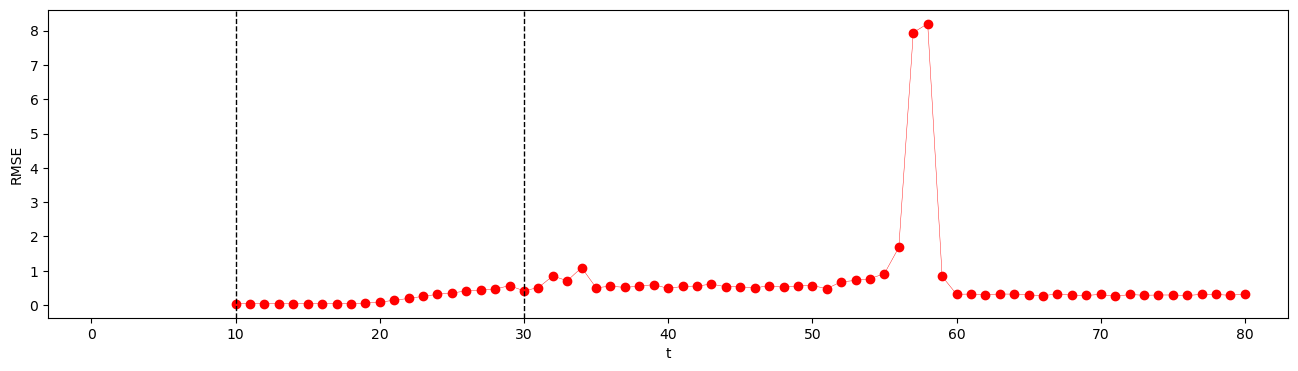

In [ ]:
exp.plot_RMSE() # forse meglio in log scale

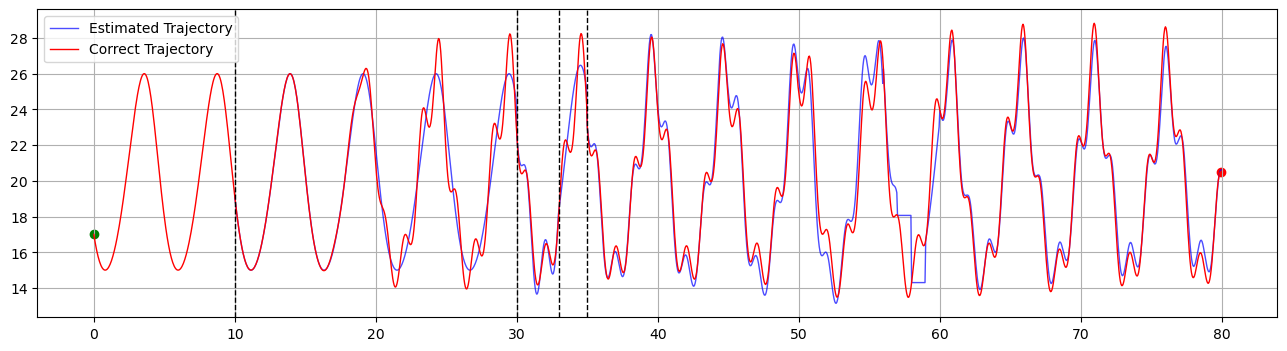

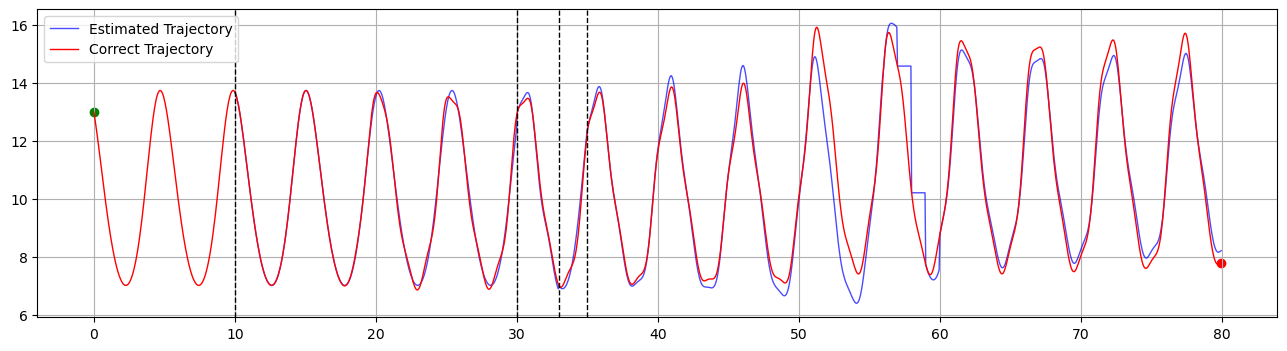

In [10]:
from data.SINDy_data import evaluate_RMSE_d, evaluate_traj_d_1D
x_id = 0

plot_times_1 = exp.turning_points.copy() 
plot_models_1 = exp.model_history.copy()
plot_times_1.append(exp.H)
plot_models_1.insert(0, plot_models_1[0])

xt_true = []
pred_list = []
time_vector_1 = np.arange(0, plot_times_1[-1], exp.dt)
time_vector_2 = np.arange(plot_times_1[1], plot_times_1[-1], exp.dt)
for i in range(len(plot_models_1)):
    xt_true_i, pred_i = evaluate_traj_d_1D(plot_models_1[i], exp.ode, 20, 1, [17, 13, 0], [17, 13, 0], plot_times_1[i], plot_times_1[i+1], x_id, exp.dim_x, exp.dim_k, plot=False)
    if i == 0:
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
    else: 
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
        pred_list = np.concatenate((pred_list, pred_i), axis = 0)


fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(time_vector_2, pred_list, color='blue', linewidth=1.0, alpha=0.7, label='Estimated Trajectory')
ax.plot(time_vector_1, xt_true, color='red', linewidth=1.0, label='Correct Trajectory')
ax.scatter(time_vector_1[-1], xt_true[-1], color='red')
ax.scatter(time_vector_1[0], xt_true[0], color='green')
ax.legend()
ax.grid()
for x in [plot_times_1[1], plot_times_1[2], plot_times_1[3], plot_times_1[4]]: 
    ax.axvline(x=x, color='black', linestyle='--', linewidth=1.0, label='Vertical Line' if x == 1 else "")



x_id = 1

plot_times_1 = exp.turning_points.copy() 
plot_models_1 = exp.model_history.copy()
plot_times_1.append(exp.H)
plot_models_1.insert(0, plot_models_1[0])

xt_true = []
pred_list = []
time_vector_1 = np.arange(0, plot_times_1[-1], exp.dt)
time_vector_2 = np.arange(plot_times_1[1], plot_times_1[-1], exp.dt)
for i in range(len(plot_models_1)):
    xt_true_i, pred_i = evaluate_traj_d_1D(plot_models_1[i], exp.ode, 20, 1, [17, 13, 0], [17, 13, 0], plot_times_1[i], plot_times_1[i+1], x_id, exp.dim_x, exp.dim_k, plot=False)
    if i == 0:
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
    else: 
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
        pred_list = np.concatenate((pred_list, pred_i), axis = 0)


fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(time_vector_2, pred_list, color='blue', linewidth=1.0, alpha=0.7, label='Estimated Trajectory')
ax.plot(time_vector_1, xt_true, color='red', linewidth=1.0, label='Correct Trajectory')
ax.scatter(time_vector_1[-1], xt_true[-1], color='red')
ax.scatter(time_vector_1[0], xt_true[0], color='green')
ax.legend()
ax.grid()
for x in [plot_times_1[1], plot_times_1[2], plot_times_1[3], plot_times_1[4]]:  
    ax.axvline(x=x, color='black', linestyle='--', linewidth=1.0, label='Vertical Line' if x == 1 else "")

In [4]:
T0 = 50
T = 60

X_lista = [np.array(x)[T0*freq:T*freq, :] for x in X_list]
dX_lista = [np.array(dx)[T0*freq:T*freq, :] for dx in dX_list]

model = symbolic_SINDy(SR_method='D-CODE', 
                       x_id=0,
                       degree=2,
                       threshold=0.07,
                       penalty=10,
                       product=True,
                       max_patience=6)

model, building_blocks_lambda, _, _, _, _ =  model.call(X_list=X_lista, dX_list=dX_lista, param_list=param_list,
           feature_names=feature_names, dt=dt, building_blocks_lambda=None, 
           function_names=None, patience=0, lazy=True, ode=ode, ode_name=ode_name,
           ode_param=ode_param, freq_SR=freq_SR, n_sample=n_sample, 
           noise_ratio=noise_ratio, seed=seed, n_seed=n_seed, 
           T0=T0, T=T, dim_x=dim_x, dim_k=dim_k)


Searching for the best building block:
Model:
(X0)' = -1.149 1 + 1.082 X0 + 0.098 X1 + -0.097 X0 X1 + 0.316 sin(X0)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = 6.308 1 + 1.081 X0 + 0.093 X1 + -0.135 X2 + -0.097 X0 X1 + -10.464 sin(X2) + 0.193 X2 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.134 1 + 1.081 X0 + 0.098 X1 + -0.097 X0 X1 + -0.083 sin(X0*X1)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.270 1 + 1.083 X0 + 0.105 X1 + -0.097 X0 X1 + -6.667 sin(X1) + 0.116 X2 sin(X1)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.143 1 + 1.081 X0 + 0.098 X1 + -0.097 X0 X1 + 0.138 -sin(X1**2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.136 1 + 1.081 X0 + 0.098 X1 + -0.097 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.136 1 + 1.081 X0 + 0.097 X1 + -0.097 X0 X1 + -0.204 -sin(X0 - X1)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = 6.215 1 + 1.082 X0 

Commento dei risultati:
- Scelta del modello -> per essere beccata la dinamica deve essere chiara alla SR, non confusa con rumore e determinante nella traiettoria. Variazioni lente dei parametri non possono essere mai beccate su finestre temporali ragionevoli.
- Scelta numero di generazioni -> avere migliore stima delle costanti: la dinamica tra 5.028 e 5.007 è completamente diversa in termini di rmse
- Testata la capacità di aggiustarsi anche quando fitta modelli  piu o meno sbagliati influenzati da transitori: se il building block ce prima o poi la dinamica vera viene catturata
- Lo switch -> mette in crisi il modello perche causa un transitorio -> prova a fittare un modello con i blocchi che ha (che sono giusti) ma non ne trova mai un modello capace di spiegare la dinamica. questo forza il modello a cercare nuovi blocchi, per fortuna, lontano dal transitorio li ritrova e si sistema.
- Lo switch è stato introdotto per testare la capacità della SR di ritrovare trovare il blocco mancante. In generale si osserva che in base al punto di ricerca non sempre trova il blocco corretto

- T = 56: sin(0.5008226879169348*X2) -> NON TROVA patience = 4
- T = 57: sin(5.85685419176154*X2) -> NON TROVA patience = 5
- T = 58: sin(5.068949033687468*sin(X2)) patience = 6
- T = 59: sin(5.448175735771112*sin(X2)) patience = 7
- T = 60 QUI trova tanti blocchi potenziali

- sin(4.997271008241834*X2)
- sin(5.102140407099291*X2)
- sin(5.010848520737575*X2)

- T = 61: sin(5.33594343872588*X2)

- per altri valori di T il blocco decisivo NON viene trovato vista la natura complessa del problema. Tipicamente viene trovato nella prossimita dell'intervalli decimali in cui non cerca anche sfasamenti

- Nota inoltre che anche se da un punto di vista teorico gli altri blocchi trovati restituiscono soluzioni che sono concettualmente corrette per descrivere la dinamica (a volte 5.028, altre 5.20), capita che gli altri blocchi trovati da SR generino localmente con RMSE piu basso e vengono preferite sistematicamente, ma i questi modelli fittati non sono affatto stabili: ogni 2 secondi ce una nuova ricerca del blocco tra quelli disponibili, ma quelli 'giusti' continuano a generare errori troppo alti

- Esperimento positivo che spiega la forza dell'approcio: è stato identificato un termine che a priori non verrebbe mai considerato in sindy. La generalizzazione pero è obiettivamente complessa. bisogna sempre valutare trade off tra finestra temporale, pazienza e fit -> realisticamente è difficile trovare in modo obiettivo un buon compromesso. Inoltre aggiungendo ulteriore rumore l'identificazione diventa ancora piu complessa.